In [40]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib import animation
from IPython.display import HTML

In [41]:
COURANT = 0.3
LAMBDA_0 = 0.1
SIGMA = 0.5

X_max = 15
T_max = 30
X_min = T_min = 0
U_0 = 25

X_STEPS = 100
T_STEPS = math.ceil(LAMBDA_0 * (T_max - T_min) * (U_0**SIGMA) * T_max * X_STEPS**2 / 
                    (X_max - X_min)**2 / COURANT) 

C = np.sqrt((T_0**SIGMA) * LAMBDA_0 / SIGMA)

In [42]:
X_RANGE = np.linspace(X_min, X_max, X_STEPS)
T_RANGE = np.linspace(T_min, T_max, T_STEPS)
X_STEP = X_RANGE[1] - X_RANGE[0]
T_STEP = T_RANGE[1] - T_RANGE[0]

X, T = np.meshgrid(X_RANGE, T_RANGE, indexing='ij')

# Boundary / initial conditions
U = np.zeros_like(X)
U[:, 0] = 0
U[0, :] = U_0 * (T**(1/SIGMA))[0, :]
U[-1, :] = 0

In [43]:
def calc_lambda(u):
    return LAMBDA_0 * (u ** SIGMA)

def calc_lambda_plus(L):
    L_plus = np.roll(L, -1)
    with np.errstate(divide='ignore', invalid='ignore'):
        result = 2*L*L_plus / (L + L_plus)
    mask = np.abs(L + L_plus) < 0.1
    result[mask] = ((L + L_plus) / 2)[mask]
    return result
    
def calc_lambda_minus(L):
    L_minus = np.roll(L, +1)
    with np.errstate(divide='ignore', invalid='ignore'):
        result = 2*L*L_minus / (L + L_minus)
    
    mask = np.abs(L + L_minus) < 0.1
    result[mask] = ((L + L_minus) / 2)[mask]
    return result

def calculate_exact_solution(x, t):
    result = np.zeros_like(x)
    mask = C * t > x 
    x = x[mask]
    t = t[mask]
    
    temp = C * SIGMA * (C * t - x) / LAMBDA_0
    result[mask] = np.power(temp, 1./SIGMA)
    return result

In [44]:
LAMBDA = calc_lambda(U)

for j in tqdm_notebook(list(range(0, T_STEPS-1))):
    current_u = U[:, j]
    current_lambda = calc_lambda(current_u)
    lambda_plus = calc_lambda_plus(current_lambda)
    lambda_minus = calc_lambda_minus(current_lambda)
    rhs = (
        lambda_plus * (np.roll(current_u, -1) - current_u) -
        lambda_minus * (current_u - np.roll(current_u, +1))
    ) / (X_STEP**2)
    
    mask = np.zeros_like(rhs).astype(bool)
    mask[1:-1] = True
    
    U[mask, j+1] = T_STEP * rhs[mask] + U[mask, j]

In [45]:
U_EXACT = calculate_exact_solution(X, T)

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf = ax.plot_surface(X, T, U_EXACT)

In [46]:
T_STEPS

66667

In [37]:
# fig, ax = plt.subplots(figsize=(20, 10))

# _N = 10
# ax.plot(X_RANGE, U[:, _N], color='black', lw=5, label='approx')
# ax.plot(X_RANGE, U_EXACT[:, _N], color='red', lw=2, label='exact')
# ax.grid(ls='--')
# ax.legend()

In [48]:
plt.rcParams.update({'font.size': 15})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[english]{babel}')

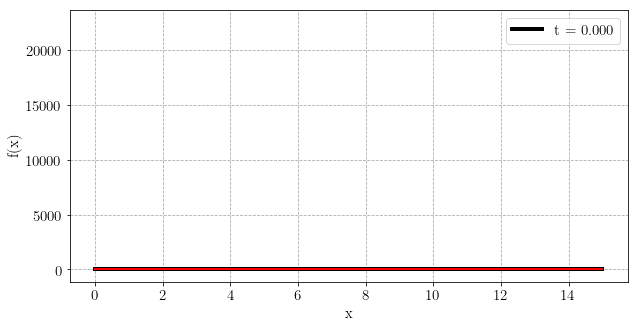

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))

l1, = ax.plot(X_RANGE, U[:,-1], lw=4, color='black', label=None)
l2, = ax.plot(X_RANGE, U_EXACT[:,-1], lw=2, color='red', label=None)

ax.grid(c='#aaaaaa', ls='--')

ax.set_ylabel("f(x)")
ax.set_xlabel("x")

def animate(i):
    l1.set_data(X_RANGE, U[:, i])
    l1.set_label('t = ' + '%.3f' %(i * T_STEP))
    l2.set_data(X_RANGE, U_EXACT[:, i])

    legend = plt.legend(loc='upper right')
    return l1, l2, legend

ani = animation.FuncAnimation(fig, animate, frames= np.linspace(0, T_STEPS-1, 100).astype(int), interval=50)

#ani.save("solution.mp4")
HTML(ani.to_jshtml())